# Unsupervised Learning
A project by Dustin Pacholleck

## Introduction

In the financial market it is vital to observe how companies are performing. I special focus is usually on the reports every publicly traded company has to issue every quarter. 
To get a quick feeling about the vast variety of data, clustering comes in handy. It allows the investor to see similary performing companies at a glance. He can quickly see which companies to investigate further for his investment decision. Not only for investors it becomes relevant to group companies into clusters. Also bank can leverage this method to preliminary investigate the health of a company based on its financial statement.

Therefore, this projects tries to apply clustering on the S&P 500 companies based on their quarterly report in quarter 3 2021. The data was mined in a project by Pierre-Louis Danieau and can be found on https://www.kaggle.com/pierrelouisdanieau/financial-data-sp500-companies. 

## Set-Up

In [22]:
install.packages("psych")
install.packages("data.table")


  There is a binary version available but the source version is later:
      binary source needs_compilation
psych  2.1.3  2.1.9             FALSE



installing the source package 'psych'




  There is a binary version available but the source version is later:
           binary source needs_compilation
data.table 1.14.0 1.14.2              TRUE

  Binaries will be installed


Warning message:
"package 'data.table' is in use and will not be installed"

In [23]:
install.packages("tidyverse")
library(tidyverse)

also installing the dependencies 'xfun', 'tinytex', 'knitr', 'rmarkdown', 'jsonlite', 'reprex'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
xfun        0.22   0.29              TRUE
tinytex     0.31   0.37             FALSE
knitr       1.33   1.37             FALSE
rmarkdown    2.8   2.11             FALSE
jsonlite   1.7.2  1.7.3              TRUE
reprex     2.0.0  2.0.1             FALSE

  Binaries will be installed
package 'xfun' successfully unpacked and MD5 sums checked
package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\jsonlite\libs\x64\jsonlite.dll zu kopieren: Permission denied"Warning message:
"restored 'jsonlite'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpCAFaau\downloaded_packages


installing the source packages 'tinytex', 'knitr', 'rmarkdown', 'reprex'

Warning message in install.packages("tidyverse"):
"installation of package 'tinytex' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'knitr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'rmarkdown' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'reprex' had non-zero exit status"Warning message:
"package 'tidyverse' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'jsonlite' 1.6 is already loaded, but >= 1.7.2 is required


In [24]:
library(psych)
library(data.table)

## Data Preperation

In [25]:
df <- read.csv("C:/Users/duzzi/Documents/University_Projects/Unsupervised-Learning/data/financial data sp500 companies.csv")

In [27]:
head(df)

X,date,firm,Ticker,Research.Development,Income.Before.Tax,Net.Income,Selling.General.Administrative,Gross.Profit,Ebit,Operating.Income,Interest.Expense,Income.Tax.Expense,Total.Revenue,Total.Operating.Expenses,Cost.Of.Revenue,Total.Other.Income.Expense.Net,Net.Income.From.Continuing.Ops,Net.Income.Applicable.To.Common.Shares
0,2021-09-30,3M,MMM,4.82e+08,1.761e+09,1.434e+09,1.739e+09,4.089e+09,1.868e+09,1.868e+09,-1.17e+08,3.24e+08,8.942e+09,7.074e+09,4.853e+09,-1.07e+08,1.437e+09,1.434e+09
1,2021-06-30,3M,MMM,5.14e+08,1.940e+09,1.524e+09,1.666e+09,4.231e+09,2.051e+09,2.051e+09,-1.21e+08,4.15e+08,8.950e+09,6.899e+09,4.719e+09,-1.11e+08,1.525e+09,1.524e+09
2,2021-03-31,3M,MMM,5.20e+08,1.946e+09,1.624e+09,1.720e+09,4.327e+09,2.087e+09,2.087e+09,-1.32e+08,3.19e+08,8.851e+09,6.764e+09,4.524e+09,-1.41e+08,1.627e+09,1.624e+09
3,2020-12-31,3M,MMM,4.49e+08,1.706e+09,1.389e+09,1.814e+09,4.246e+09,1.983e+09,1.983e+09,-1.41e+08,3.16e+08,8.583e+09,6.600e+09,4.337e+09,-2.77e+08,1.390e+09,1.389e+09
4,2021-09-30,3M,MMM,4.82e+08,1.761e+09,1.434e+09,1.739e+09,4.089e+09,1.868e+09,1.868e+09,-1.17e+08,3.24e+08,8.942e+09,7.074e+09,4.853e+09,-1.07e+08,1.437e+09,1.434e+09
5,2021-06-30,3M,MMM,5.14e+08,1.940e+09,1.524e+09,1.666e+09,4.231e+09,2.051e+09,2.051e+09,-1.21e+08,4.15e+08,8.950e+09,6.899e+09,4.719e+09,-1.11e+08,1.525e+09,1.524e+09


In [29]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X,1,2012,1.005500e+03,5.809587e+02,1005.5,1.005500e+03,7.457478e+02,0.0000e+00,2.01100e+03,2011,0.000000e+00,-1.201789,1.295183e+01
date*,2,2012,7.268091e+01,3.483693e+01,81.0,7.221242e+01,4.447800e+01,1.0000e+00,1.41000e+02,140,8.364356e-02,-1.007849,7.766510e-01
firm*,3,2012,2.510020e+02,1.452360e+02,251.0,2.510000e+02,1.868076e+02,1.0000e+00,5.02000e+02,501,8.111970e-05,-1.201909,3.237876e+00
Ticker*,4,2012,2.516103e+02,1.448276e+02,252.0,2.516379e+02,1.853250e+02,1.0000e+00,5.02000e+02,501,-2.172555e-03,-1.199221,3.228772e+00
Research.Development,5,634,6.344579e+08,1.502277e+09,166000000.0,2.759287e+08,1.958744e+08,-1.0300e+07,1.64660e+10,16476300000,5.023922e+00,32.925824,5.966306e+07
Income.Before.Tax,6,2011,8.740406e+08,2.486569e+09,345900000.0,5.136325e+08,3.811765e+08,-2.6613e+10,3.35790e+10,60192000000,4.545634e+00,53.640806,5.544911e+07
Net.Income,7,2012,7.166330e+08,2.109107e+09,283000000.0,4.162791e+08,3.068011e+08,-2.0070e+10,2.87550e+10,48825000000,4.766506e+00,52.335555,4.702021e+07
Selling.General.Administrative,8,1952,1.103981e+09,2.519176e+09,381466000.0,5.619678e+08,4.379111e+08,-3.6130e+09,3.03310e+10,33944000000,6.252102e+00,53.376249,5.701888e+07
Gross.Profit,9,2012,2.567361e+09,5.045961e+09,1055623000.0,1.429321e+09,9.330106e+08,-4.0620e+09,4.89040e+10,52966000000,4.722847e+00,26.982338,1.124941e+08
Ebit,10,2012,8.725539e+08,2.109224e+09,356059500.0,5.105455e+08,3.825708e+08,-6.3890e+09,3.35340e+10,39923000000,6.883945e+00,69.348730,4.702283e+07


In [51]:
# Check Structure
str(df)

'data.frame':	2012 obs. of  19 variables:
 $ X                                     : int  0 1 2 3 4 5 6 7 8 9 ...
 $ date                                  : Date, format: "2021-09-30" "2021-06-30" ...
 $ firm                                  : chr  "3M" "3M" "3M" "3M" ...
 $ Ticker                                : chr  "MMM" "MMM" "MMM" "MMM" ...
 $ Research.Development                  : num  4.82e+08 5.14e+08 5.20e+08 4.49e+08 4.82e+08 5.14e+08 5.20e+08 4.49e+08 NA NA ...
 $ Income.Before.Tax                     : num  1.76e+09 1.94e+09 1.95e+09 1.71e+09 1.76e+09 ...
 $ Net.Income                            : num  1.43e+09 1.52e+09 1.62e+09 1.39e+09 1.43e+09 ...
 $ Selling.General.Administrative        : num  1.74e+09 1.67e+09 1.72e+09 1.81e+09 1.74e+09 ...
 $ Gross.Profit                          : num  4.09e+09 4.23e+09 4.33e+09 4.25e+09 4.09e+09 ...
 $ Ebit                                  : num  1.87e+09 2.05e+09 2.09e+09 1.98e+09 1.87e+09 ...
 $ Operating.Income                 

In [31]:
df$date <- as.Date(df$date)
df$Ticker <- as.character(df$Ticker)
df$firm <- as.character(df$firm)

In [32]:
dt <- as.data.table(df, TRUE)

In [33]:
# Only most recent date
dt_adjust <- dt[date== "2021-09-30"]

In [34]:
# remove rn and x 
dt_adjust <- dt_adjust[, !c("rn","X")]

In [35]:
#remove duplicates
dt_adjust <- dt_adjust[!duplicated(dt_adjust)]

### Reinspect dataframe after first cleaning

In [36]:
describe(dt_adjust)

Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für min; gebe Inf zurück"Warning message in FUN(newX[, i], ...):
"kein nicht-fehlendes Argument für max; gebe -Inf zurück"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
date,1,90,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
firm*,2,90,45.5,2.612470e+01,45.5,45.5,3.335850e+01,1,9.0000e+01,89,0.000000,-1.240068,2.753785e+00
Ticker*,3,90,45.5,2.612470e+01,45.5,45.5,3.335850e+01,1,9.0000e+01,89,0.000000,-1.240068,2.753785e+00
Research.Development,4,24,268885583.3,3.821233e+08,80651000.0,200403250.0,7.828276e+07,13289000,1.6550e+09,1641711000,2.084356,4.519439,7.800060e+07
Income.Before.Tax,5,90,782506400.0,1.361899e+09,444500000.0,574561750.0,4.216514e+08,-2246000000,8.9500e+09,11196000000,3.042392,14.176457,1.435567e+08
Net.Income,6,90,641338166.7,1.122860e+09,347150000.0,466862444.4,3.458861e+08,-1564000000,7.6910e+09,9255000000,3.329097,16.662442,1.183598e+08
Selling.General.Administrative,7,85,944478764.7,1.850726e+09,318800000.0,535253333.3,3.659057e+08,-142000000,1.2675e+10,12817000000,3.992266,19.131312,2.007394e+08
Gross.Profit,8,90,2092222877.8,3.291859e+09,970435500.0,1352529361.1,8.496254e+08,-349683000,2.3390e+10,23739683000,3.878007,18.984572,3.469924e+08
Ebit,9,90,686783433.3,9.521512e+08,415800000.0,498285708.3,3.699087e+08,-1006062000,4.9610e+09,5967062000,2.522526,7.520405,1.003655e+08
Operating.Income,10,90,902904544.4,1.384216e+09,471411500.0,605878458.3,3.704802e+08,-1006062000,8.9500e+09,9956062000,3.329471,13.490809,1.459091e+08


In [37]:
#drop date, firm, ticker, R&D (high missing values)
dt_adjust <- dt_adjust[,!1:4]
dt_adjust <- na.omit(dt_adjust)

## Analyse relationship of variables

In [57]:
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

also installing the dependencies 'xts', 'quadprog', 'zoo'



package 'xts' successfully unpacked and MD5 sums checked
package 'quadprog' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked
package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpCAFaau\downloaded_packages


Warning message:
"package 'PerformanceAnalytics' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:data.table':

    first, last


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



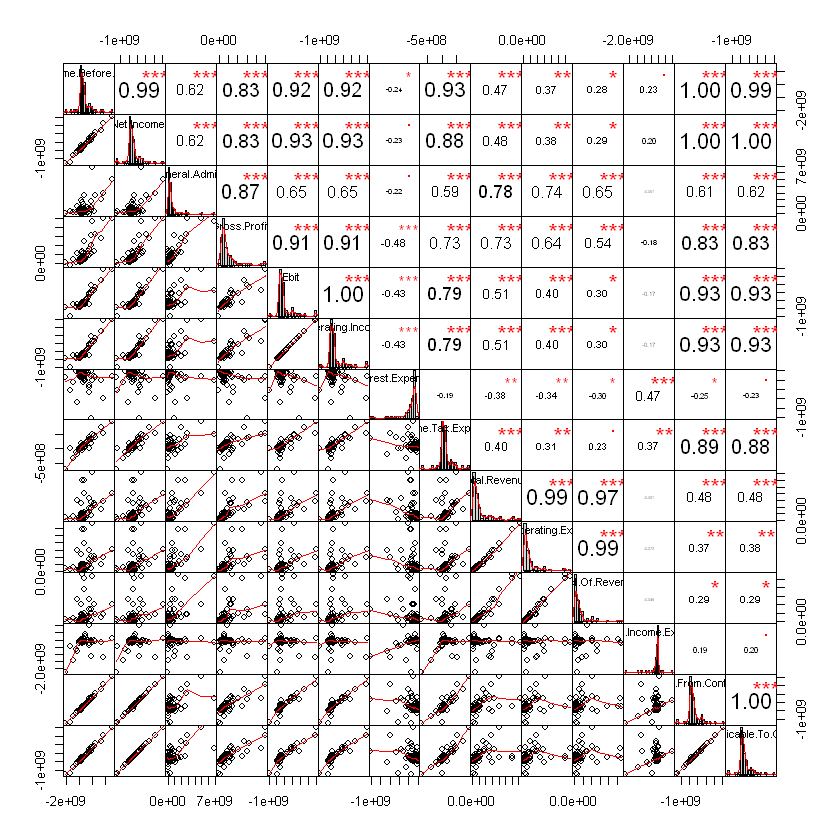

In [58]:
chart.Correlation(dt_adjust, histogram=TRUE, pch=19)

From the graph above we see that we deal with highly correlated data. Therefore, we should either drop variables or we can use dimension reduction.

## Dimension Reduction

Intro to Dimension Reduction

In [38]:
df_adj_z <- as.data.frame(lapply(dt_adjust, scale))

In [70]:
pca <- prcomp(df_adj_z, center=FALSE, scale=FALSE)

In [71]:
pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Income.Before.Tax,-0.313723602,0.2120264,-0.04057889,0.063090009,-0.07975123,-0.007465774,-0.06979151,-0.302109736,0.0080370334,4.032476e-01,9.016463e-03,-7.080666e-01,-2.903532e-01,4.518277e-03
Net.Income,-0.314109913,0.2007916,-0.02863539,0.007272681,-0.17670294,0.229932105,-0.05163781,0.543749976,0.6911740995,-7.090512e-11,9.133319e-16,-5.551115e-16,-2.317591e-15,4.965646e-17
Selling.General.Administrative,-0.267801186,-0.2010564,-0.11765092,-0.436620115,0.64430283,0.245691370,-0.45579427,-0.009438939,-0.0072168279,2.561149e-12,-2.513181e-16,-5.551115e-17,-2.081668e-17,9.410875e-17
Gross.Profit,-0.319079826,-0.0848021,0.12416207,-0.169813517,0.26869891,0.157769002,0.82140559,-0.056096604,0.0082666297,-8.556509e-03,-8.232005e-02,9.567831e-02,-2.356679e-01,1.370639e-02
Ebit,-0.314051155,0.1031201,0.22636163,-0.099864539,-0.15451989,-0.119551466,-0.10208179,-0.222383894,0.0053395729,-4.773020e-01,-5.161320e-02,-9.577491e-03,1.074133e-02,-7.076472e-01
Operating.Income,-0.314051155,0.1031201,0.22636163,-0.099864539,-0.15451989,-0.119551466,-0.10208179,-0.222383894,0.0053395729,-4.773020e-01,-2.365073e-02,-2.698818e-02,7.604561e-02,7.046737e-01
Interest.Expense,0.132690500,0.2158609,-0.50412290,-0.732101806,-0.29539099,-0.201171243,0.13263384,-0.019139518,0.0007816539,5.333296e-12,7.212655e-17,1.075529e-16,6.331741e-17,9.456953e-17
Income.Tax.Expense,-0.283220782,0.2305427,-0.14122288,0.179830068,0.36289920,-0.779524156,0.01772395,0.193016193,-0.0018513880,1.155841e-01,-1.827620e-03,1.435238e-01,5.885407e-02,-9.158468e-04
Total.Revenue,-0.242077984,-0.4060354,-0.17356118,0.045665816,-0.13891416,-0.059140785,0.09439262,-0.013163405,0.0018387935,-2.158276e-02,8.237208e-01,-5.981502e-02,1.710582e-01,-2.495575e-02
Total.Operating.Expenses,-0.212132004,-0.4487501,-0.21871687,0.063494268,-0.12552149,-0.045505355,0.11584824,0.018759512,0.0011754311,4.738505e-02,-5.100652e-01,-2.478061e-01,5.881568e-01,-2.015190e-02


In [72]:
df_adj_z.cov<-cov(df_adj_z)
df_adj_z.eigen<-eigen(df_adj_z.cov)
df_adj_z.eigen$values

[1]  8.914491e+00  2.570840e+00  1.545690e+00  5.617329e-01  2.863675e-01
 [6]  1.011038e-01  1.582755e-02  3.896652e-03  5.020768e-05  1.587762e-16
[11]  8.748695e-17  6.849918e-17 -2.719527e-17 -2.179978e-16

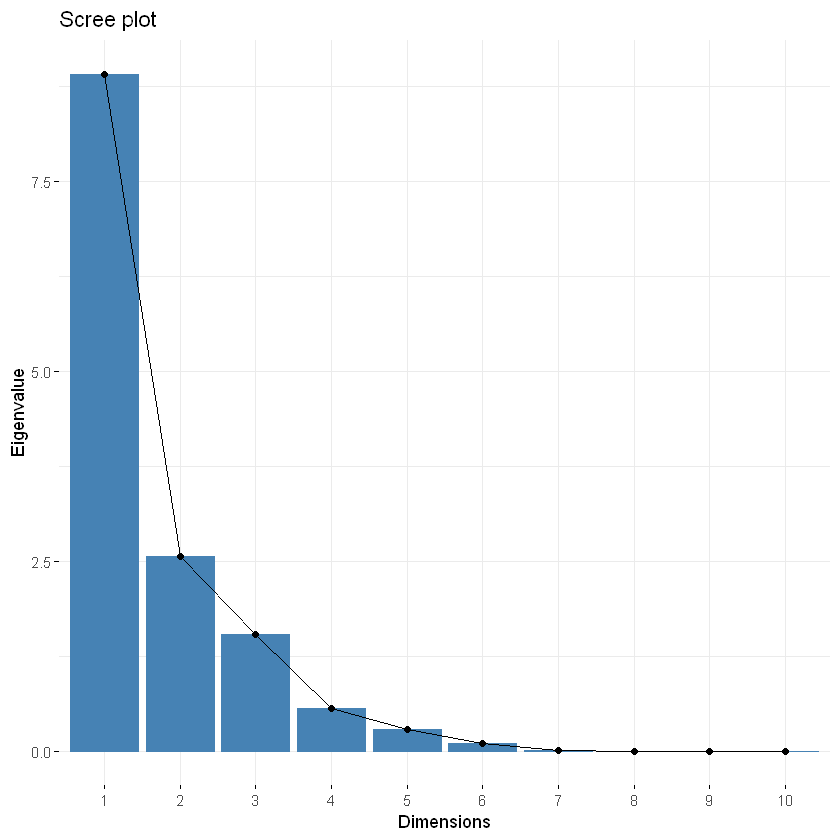

In [73]:
fviz_eig(pca, choice='eigenvalue')

In [74]:
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.9857 1.6034 1.2433 0.74949 0.53513 0.31797 0.12581
Proportion of Variance 0.6368 0.1836 0.1104 0.04012 0.02045 0.00722 0.00113
Cumulative Proportion  0.6368 0.8204 0.9308 0.97091 0.99137 0.99859 0.99972
                           PC8      PC9      PC10      PC11      PC12      PC13
Standard deviation     0.06242 0.007086 1.116e-10 2.556e-16 1.409e-16 9.795e-17
Proportion of Variance 0.00028 0.000000 0.000e+00 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  1.00000 1.000000 1.000e+00 1.000e+00 1.000e+00 1.000e+00
                            PC14
Standard deviation     1.044e-17
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

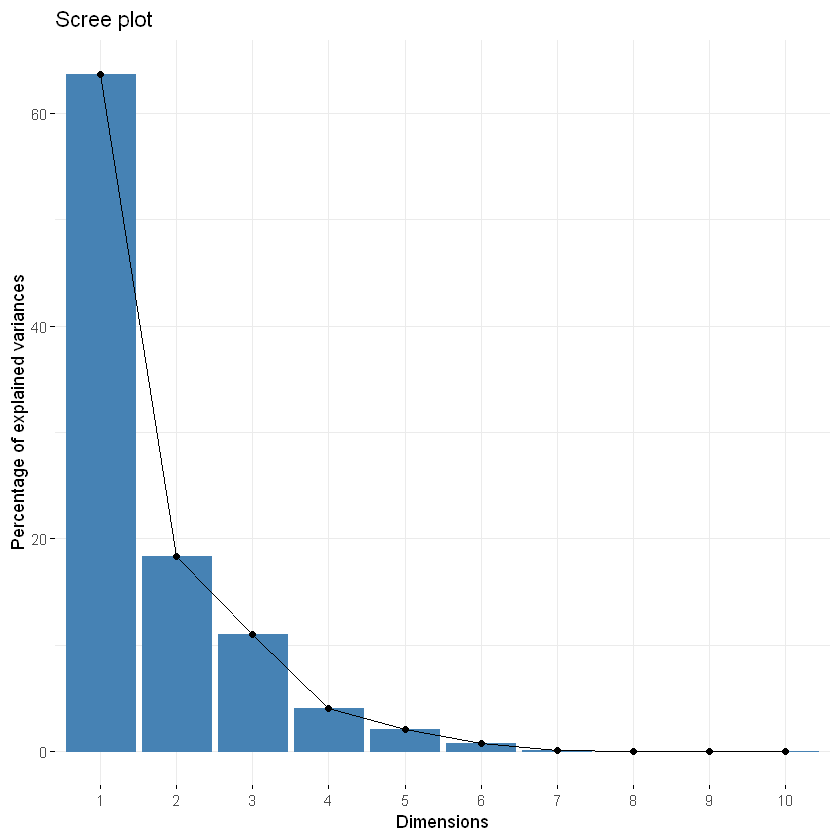

In [75]:
fviz_eig(pca)

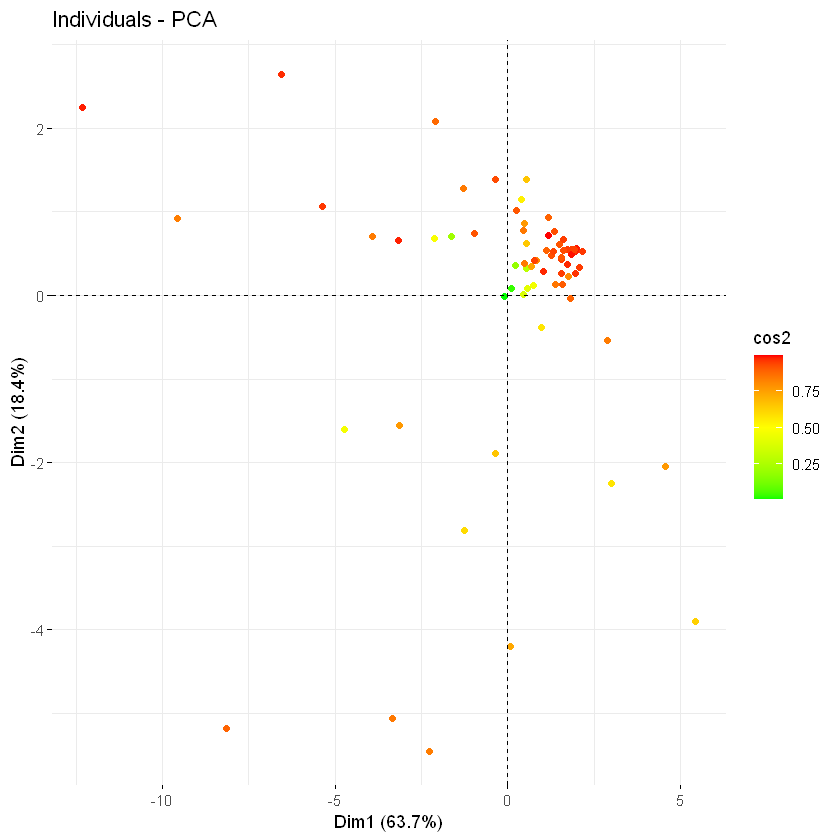

In [76]:
fviz_pca_ind(pca, col.ind="cos2", geom = "point", gradient.cols = c("green", "yellow", "red" ))

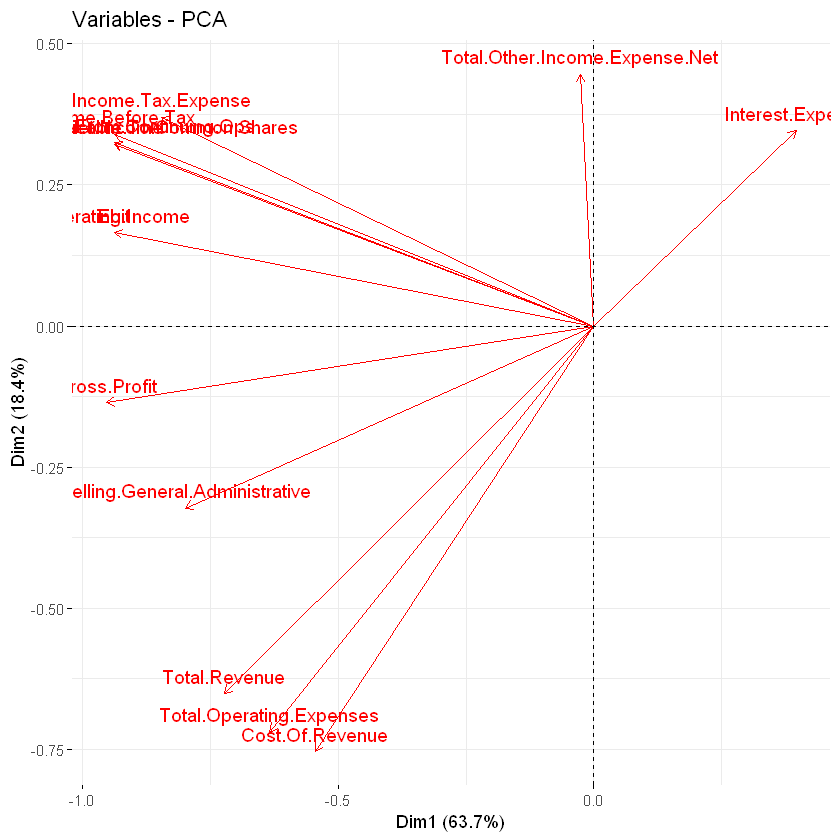

In [77]:
fviz_pca_var(pca, col.var = "red")

In [79]:
install.packages("ggplot2", repo="http://cran.r-project.org",dep=TRUE)
install.packages("gridExtra", repo="http://cran.r-project.org",dep=TRUE)
library(ggplot2)
library(gridExtra)

also installing the dependencies 'proxy', 'e1071', 'KernSmooth', 'wk', 'rex', 'systemfonts', 'textshaping', 'deldir', 'xfun', 'mvtnorm', 'TH.data', 'sandwich', 'codetools', 'tinytex', 'classInt', 's2', 'units', 'testthat', 'covr', 'ragg', 'ggplot2movies', 'hexbin', 'interp', 'knitr', 'mapproj', 'maps', 'multcomp', 'profvis', 'rgeos', 'rmarkdown', 'sf', 'svglite', 'vdiffr'




  There are binary versions available but the source versions are later:
            binary source needs_compilation
proxy       0.4-25 0.4-26              TRUE
e1071        1.7-6  1.7-9              TRUE
wk           0.4.1  0.6.0              TRUE
rex          1.2.0  1.2.1             FALSE
systemfonts  1.0.2  1.0.4              TRUE
textshaping  0.3.4  0.3.6              TRUE
deldir      0.2-10  1.0-6              TRUE
xfun          0.22   0.29              TRUE
mvtnorm      1.1-1  1.1-3              TRUE
TH.data     1.0-10  1.1-0             FALSE
sandwich     3.0-0  3.0-1             FALSE
tinytex       0.31   0.37             FALSE
s2           1.0.4  1.0.7              TRUE
units        0.7-1  0.8-0              TRUE
testthat     3.0.2  3.1.2              TRUE
ragg         1.1.2  1.2.1              TRUE
knitr         1.33   1.37             FALSE
mapproj      1.2.7  1.2.8              TRUE
maps         3.3.0  3.4.0              TRUE
multcomp    1.4-17 1.4-18             FALSE
rg

installing the source packages 'rex', 'TH.data', 'sandwich', 'tinytex', 'knitr', 'multcomp', 'rmarkdown', 'ggplot2'

Warning message in install.packages("ggplot2", repo = "http://cran.r-project.org", :
"installation of package 'tinytex' had non-zero exit status"Warning message in install.packages("ggplot2", repo = "http://cran.r-project.org", :
"installation of package 'knitr' had non-zero exit status"Warning message in install.packages("ggplot2", repo = "http://cran.r-project.org", :
"installation of package 'rmarkdown' had non-zero exit status"also installing the dependencies 'xfun', 'egg', 'knitr'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
xfun    0.22   0.29              TRUE
knitr   1.33   1.37             FALSE

  Binaries will be installed
package 'xfun' successfully unpacked and MD5 sums checked
package 'egg' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpCAFaau\downloaded_packages


installing the source package 'knitr'

Warning message in install.packages("gridExtra", repo = "http://cran.r-project.org", :
"installation of package 'knitr' had non-zero exit status"Warning message:
"package 'gridExtra' was built under R version 3.6.3"

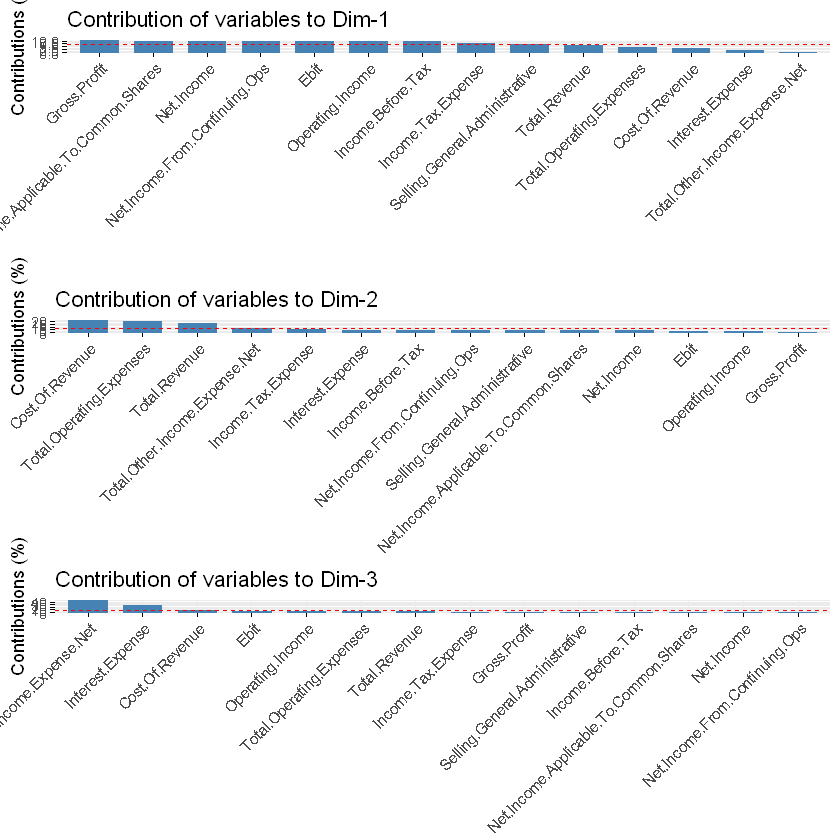

In [80]:
PC1 <- fviz_contrib(pca, choice = "var", axes = 1)
PC2 <- fviz_contrib(pca, choice = "var", axes = 2)
PC3 <- fviz_contrib(pca, choice = "var", axes = 3)
grid.arrange(PC1, PC2, PC3)

In [39]:
describe(df_adj_z)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Income.Before.Tax,1,71,2.235327e-17,1,-0.1925432,-0.1053197,0.4010861,-2.7979595,4.2619719,7.059931,1.4095732,4.943683,0.1186782
Net.Income,2,71,5.562711e-17,1,-0.2145913,-0.1122009,0.4200182,-2.5105964,4.3232392,6.833836,1.5239019,5.253728,0.1186782
Selling.General.Administrative,3,71,5.132094e-17,1,-0.3234247,-0.2321274,0.2557030,-0.6915542,5.4779983,6.169553,3.4170086,13.452928,0.1186782
Gross.Profit,4,71,-4.645291e-17,1,-0.3439002,-0.2380307,0.3561851,-0.9489967,3.8104784,4.759475,2.4426342,5.713219,0.1186782
Ebit,5,71,-5.194999e-17,1,-0.3056352,-0.2037430,0.3382685,-1.7565247,4.1008396,5.857364,2.3521850,6.177499,0.1186782
Operating.Income,6,71,-5.194999e-17,1,-0.3056352,-0.2037430,0.3382685,-1.7565247,4.1008396,5.857364,2.3521850,6.177499,0.1186782
Interest.Expense,7,71,-5.685190e-18,1,0.3345761,0.2246908,0.4354061,-5.2025151,0.6719467,5.874462,-2.9210924,10.133401,0.1186782
Income.Tax.Expense,8,71,-2.236052e-17,1,-0.1765812,-0.0757265,0.4128749,-3.7827991,3.8279906,7.610790,0.5455883,5.041531,0.1186782
Total.Revenue,9,71,8.858008e-18,1,-0.3575393,-0.2267625,0.3848157,-0.7082011,4.1165654,4.824766,2.3421149,5.389884,0.1186782
Total.Operating.Expenses,10,71,1.261492e-17,1,-0.3743289,-0.2384395,0.3046655,-0.6547039,4.1905992,4.845303,2.6024427,6.738287,0.1186782


In [40]:
# install the packages
install.packages("factoextra")
install.packages("flexclust")
install.packages("fpc")
install.packages("clustertend")
install.packages("cluster")
install.packages("ClusterR")
install.packages("tidyverse")
install.packages("dendextend")
library(factoextra)
library(flexclust)
library(fpc)
library(clustertend)
library(cluster)
library(ClusterR)
library(tidyverse)
library(dendextend)

package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpCAFaau\downloaded_packages
package 'flexclust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpCAFaau\downloaded_packages
package 'fpc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpCAFaau\downloaded_packages

  There is a binary version available but the source version is later:
            binary source needs_compilation
clustertend    1.5    1.6             FALSE



installing the source package 'clustertend'



package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpCAFaau\downloaded_packages

  There is a binary version available but the source version is later:
         binary source needs_compilation
ClusterR  1.2.4  1.2.6              TRUE

  Binaries will be installed
package 'ClusterR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpCAFaau\downloaded_packages


also installing the dependencies 'xfun', 'tinytex', 'knitr', 'rmarkdown', 'jsonlite', 'reprex'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
xfun        0.22   0.29              TRUE
tinytex     0.31   0.37             FALSE
knitr       1.33   1.37             FALSE
rmarkdown    2.8   2.11             FALSE
jsonlite   1.7.2  1.7.3              TRUE
reprex     2.0.0  2.0.1             FALSE

  Binaries will be installed
package 'xfun' successfully unpacked and MD5 sums checked
package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"Problem C:\Users\duzzi\anaconda3\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll nach C:\Users\duzzi\anaconda3\Lib\R\library\jsonlite\libs\x64\jsonlite.dll zu kopieren: Permission denied"Warning message:
"restored 'jsonlite'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpCAFaau\downloaded_packages


installing the source packages 'tinytex', 'knitr', 'rmarkdown', 'reprex'

Warning message in install.packages("tidyverse"):
"installation of package 'tinytex' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'knitr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'rmarkdown' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'reprex' had non-zero exit status"


  There is a binary version available but the source version is later:
           binary source needs_compilation
dendextend 1.15.1 1.15.2             FALSE



installing the source package 'dendextend'

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'flexclust' was built under R version 3.6.3"Loading required package: grid
Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Warning message:
"package 'fpc' was built under R version 3.6.3"Package `clustertend` is deprecated.  Use package `hopkins` instead.
Warning message:
"package 'cluster' was built under R version 3.6.3"Warning message:
"package 'ClusterR' was built under R version 3.6.3"Loading required package: gtools
Warning messag

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'jsonlite' 1.6 is already loaded, but >= 1.7.2 is required


[1] "12.6760563380282 %" "4.22535211267606 %" "5.63380281690141 %"
[4] "5.63380281690141 %" "71.830985915493 %" 


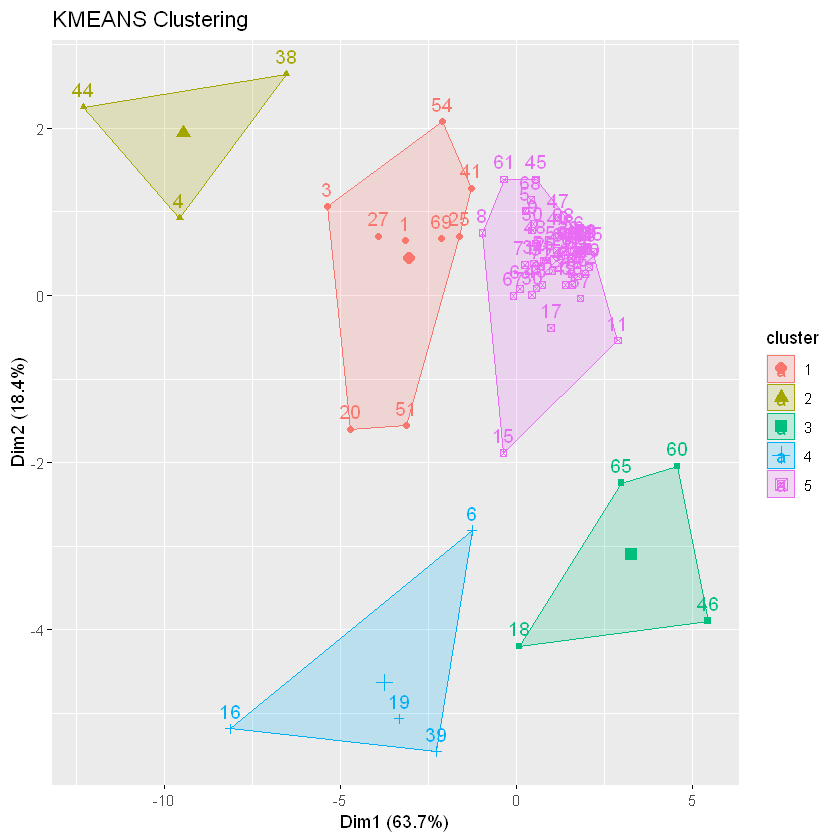

In [50]:
# kmeans
cluster_kmeans<-eclust(df_adj_z, "kmeans", k= 5) 
print(paste(cluster_kmeans$size/sum(cluster_kmeans$size)*100,"%"))
# pam
#cluster_pam<-eclust(df_adj_z, "pam", k= 5) 
# clara
#cluster_clara<-eclust(df_adj_z, "clara", k=5)


In [44]:
# optimal number of clusters
install.packages("NbClust")
library(NbClust)
library(help="NbClust") # only one function in a package

package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\duzzi\AppData\Local\Temp\RtmpCAFaau\downloaded_packages


Documentation for package 'NbClust'


		Information on package 'NbClust'

Description:

Package:            NbClust
Type:               Package
Title:              Determining the Best Number of Clusters in a Data
                    Set
Version:            3.0
Depends:            R (>= 3.1.0)
Date:               2015-04-13
Author:             Malika Charrad and Nadia Ghazzali and Veronique
                    Boiteau and Azam Niknafs
Maintainer:         Malika Charrad <malika.charrad.1@ulaval.ca>
Description:        It provides 30 indexes for determining the optimal
                    number of clusters in a data set and offers the
                    best clustering scheme from different results to
                    the user.
URL:                https://sites.google.com/site/malikacharrad/research/nbclust-package
License:            GPL-2
Packaged:           2015-04-13 13:57:52 UTC; toshiba
NeedsCompilation:   no
Repository:         CRAN
Date/Publication:   2015-04-13 22:54:43
Bui

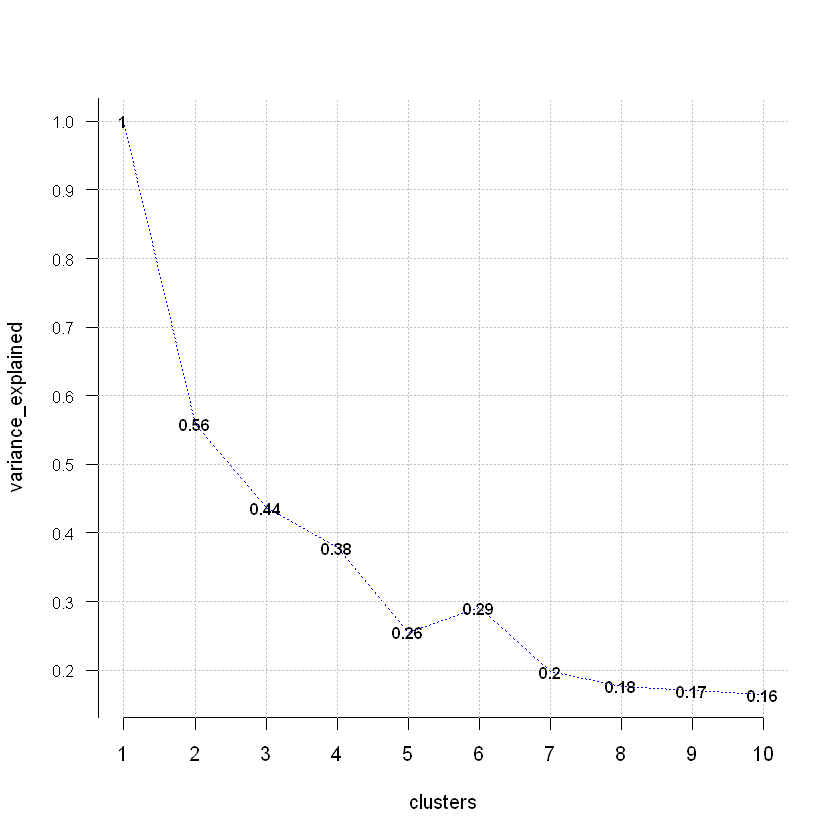

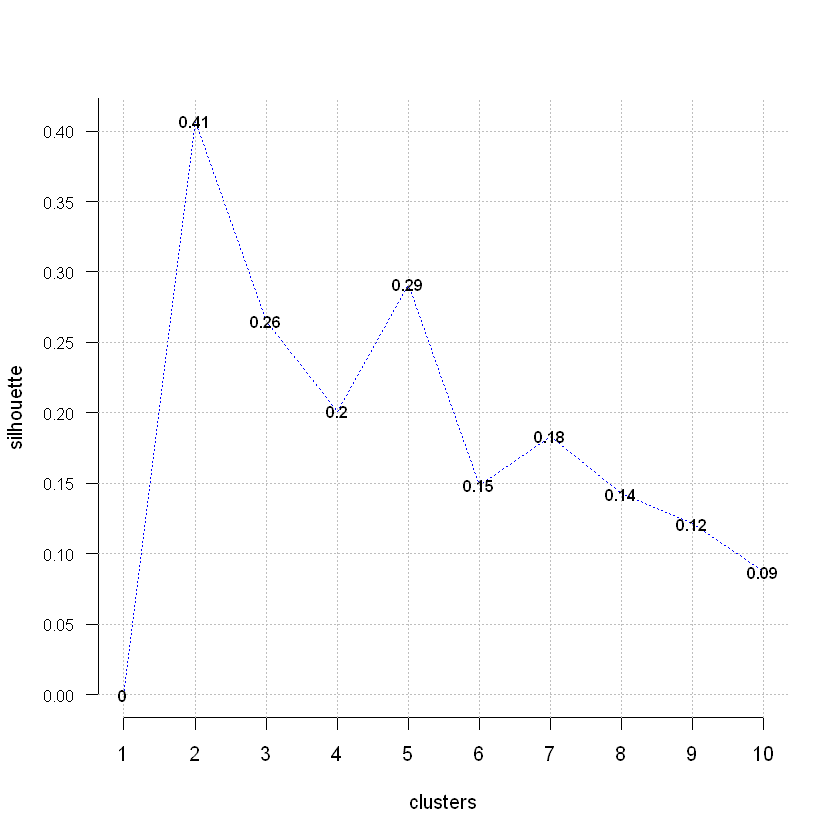

Based on the plot give the number of clusters (greater than 1) that you consider optimal?  5


[1] "list"

$pamobject
Medoids:
     ID Income.Before.Tax  Net.Income Selling.General.Administrative
[1,]  1        1.08737842  1.09895952                      0.9696150
[2,] 26       -0.30257867 -0.31000015                     -0.2356476
[3,] 19        0.07798567  0.07556976                      1.7670822
     Gross.Profit        Ebit Operating.Income Interest.Expense
[1,]     1.092601  1.06470089       1.06470089     -0.005349753
[2,]    -0.440076 -0.42722409      -0.42722409      0.518222746
[3,]     1.497821 -0.07986351      -0.07986351     -0.311745486
     Income.Tax.Expense Total.Revenue Total.Operating.Expenses Cost.Of.Revenue
[1,]          1.0295544     0.4700932                0.3448255       0.1824073
[2,]         -0.2153287    -0.4691625               -0.4378962      -0.4187007
[3,]          0.1445789     3.3810307                3.6217937       3.6263683
     Total.Other.Income.Expense.Net Net.Income.From.Continuing.Ops
[1,]                     0.09011516                     1.0766421

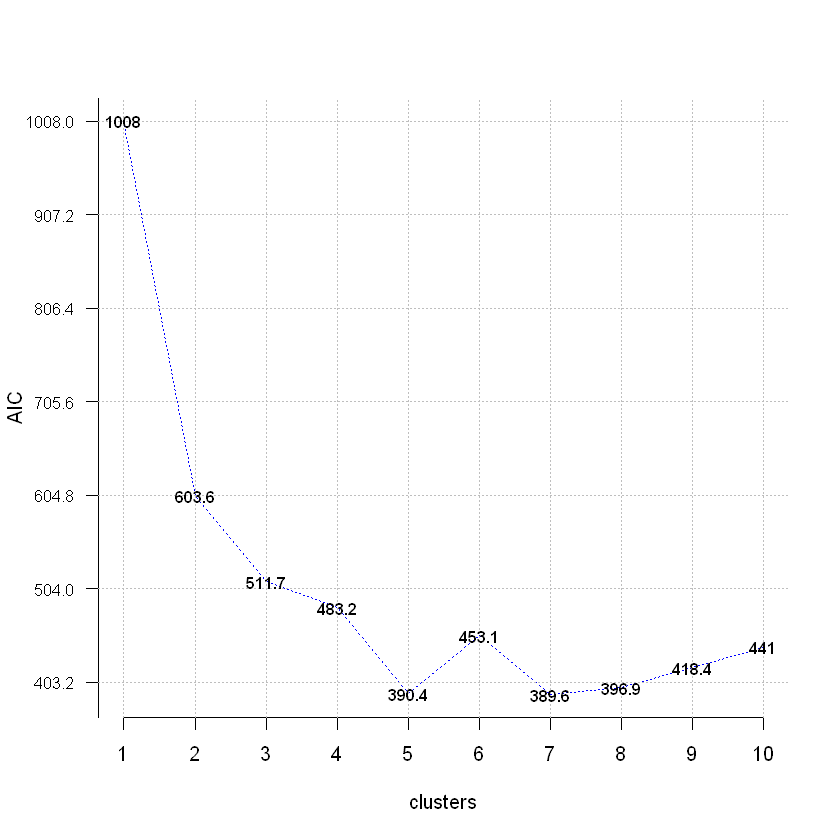

In [45]:
# opt1<-NbClust(df_adj_z, distance="euclidean", min.nc=2, max.nc=8, method="complete", index="ch")
# opt1 # it chooses the best partition
# opt1$All.index
# opt1$Best.nc
# opt1$Best.partition

# optimal number of clusters, another criteria
opt2<-Optimal_Clusters_KMeans(df_adj_z, max_clusters=10, plot_clusters = TRUE)
opt2<-Optimal_Clusters_KMeans(df_adj_z, max_clusters=10, plot_clusters=TRUE, criterion="silhouette")
opt2<-Optimal_Clusters_KMeans(df_adj_z, max_clusters=10, plot_clusters=TRUE, criterion="AIC")

# another approach, decision based on a plot
opt3<-Optimal_Clusters_Medoids(df_adj_z, 10, 'euclidean', plot_clusters=TRUE)

# automatic selection, average silhouette width
opt_aut<-pamk(df_adj_z, krange=2:10, criterion="asw", usepam=TRUE, scaling=FALSE, alpha=0.001, diss=inherits(df_adj_z, "dist"), critout=FALSE) # fpc::pamk()
class(opt_aut)
opt_aut

number of clusters estimated by optimum average silhouette width: 3 


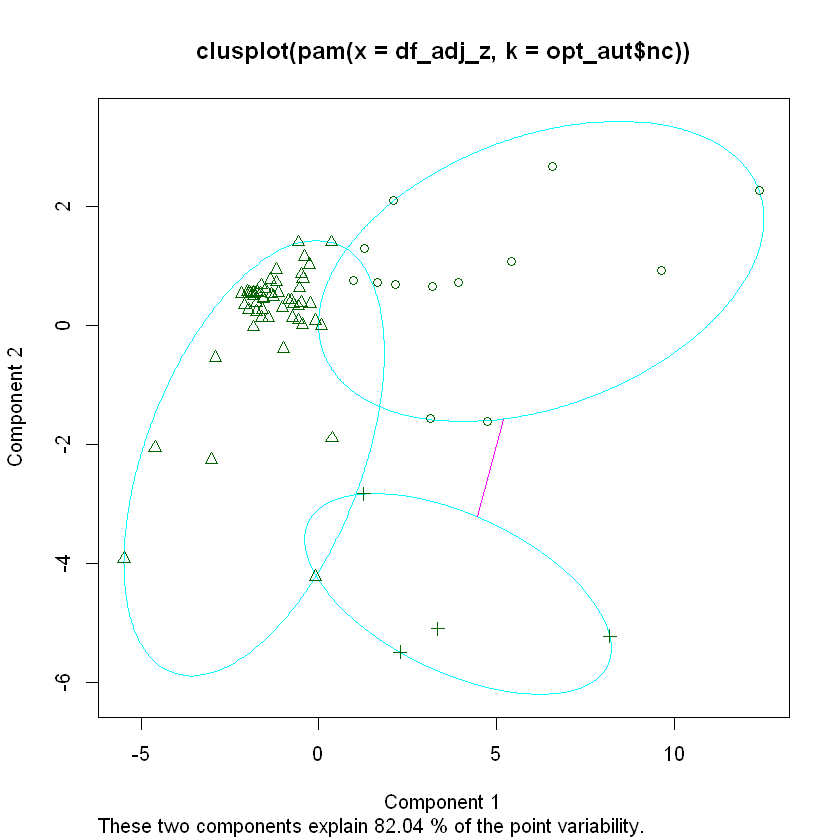

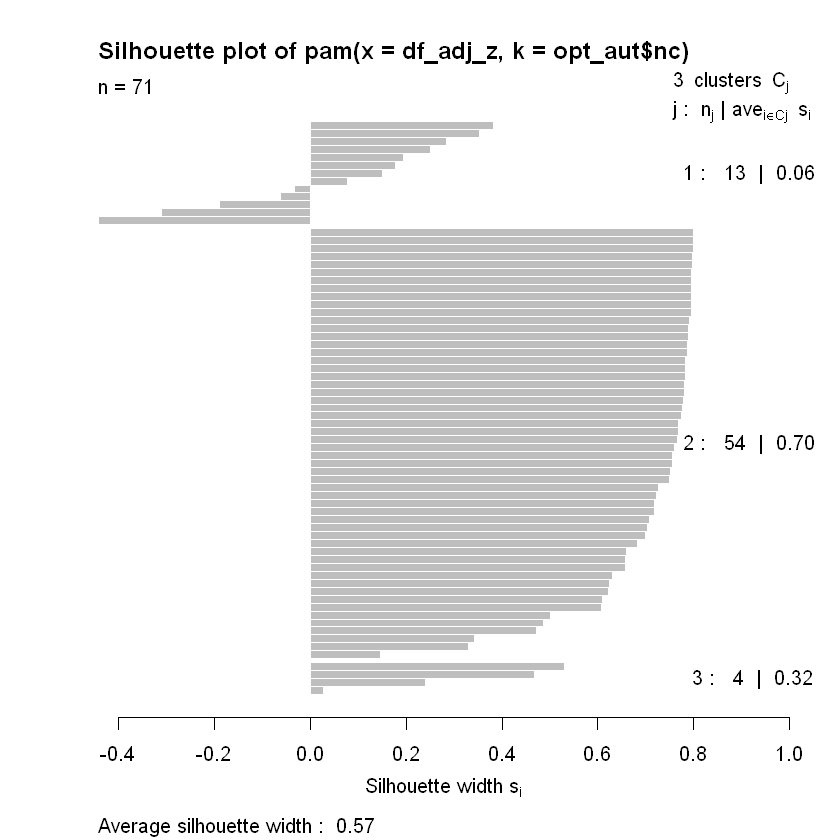

In [46]:
# announcement and plot
cat("number of clusters estimated by optimum average silhouette width:", opt_aut$nc, "\n")
plot(pam(df_adj_z, opt_aut$nc))

Warning message:
"Package `clustertend` is deprecated.  Use package `hopkins` instead."

$H
[1] 0.1462312

$hopkins_stat
[1] 0.8861252

$plot


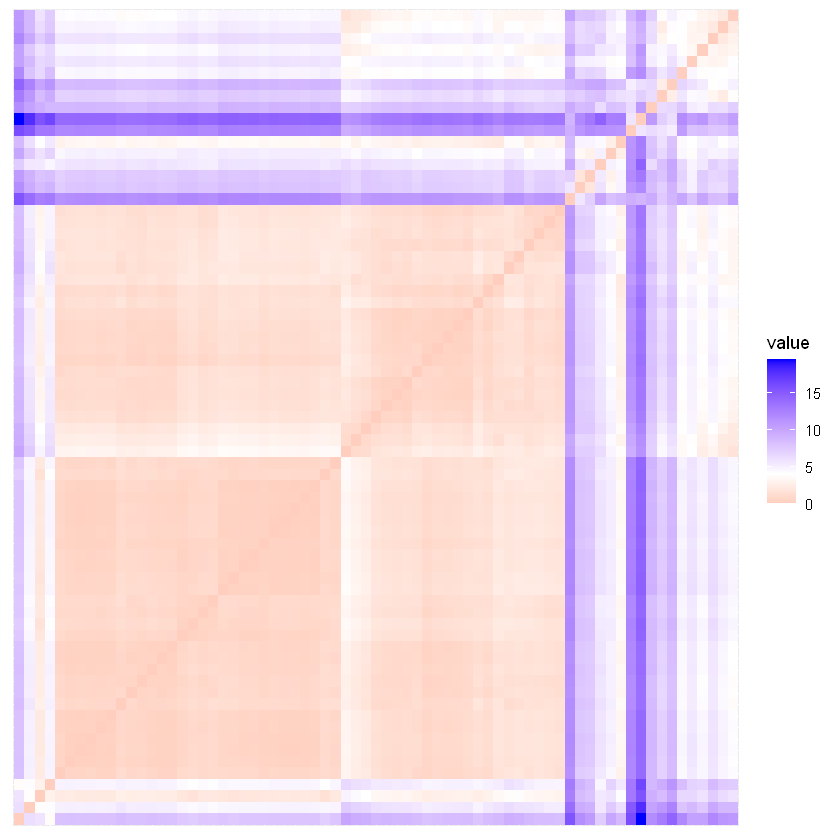

In [74]:
# Hopkins stat
hopkins(df_adj_z, n=nrow(df_adj_z)-1) 

get_clust_tendency(df_adj_z, 2, graph=TRUE, gradient=list(low="red", mid="white", high="blue"), seed = 123) # factoextra:: #interpretation as in table

In [75]:
# agglomerative approach
# dissimilarity matrix
d <- dist(df_adj_z, method = "euclidean")
# complete linkage
cluster_hierarchical <- hclust(d, method = "complete" )

# cut tree into 4 groups
sub_grp_2 <- cutree(cluster_hierarchical, k = 2)

# cut tree into 4 groups
sub_grp_4 <- cutree(cluster_hierarchical, k = 4)

# various measures of clustering quality
c.stat<-cluster.stats(d,sub_grp_2)
c.stat

c.stat2<-cluster.stats(d,sub_grp_4)
c.stat2

0.000000,5.046472
5.046472,0.000000
0.00000,11.76175
11.76175,0.00000


0.000000,2.378675,5.581892,1.514212
2.378675,0.000000,5.046472,8.481921
5.581892,5.046472,0.000000,12.531709
1.514212,8.481921,12.531709,0.000000
0.000000,7.430732,11.757003,5.717078
7.430732,0.000000,7.445687,10.750527
11.757003,7.445687,0.000000,15.071143
5.717078,10.750527,15.071143,0.000000
